## 作図用コード

In [1]:
%matplotlib inline

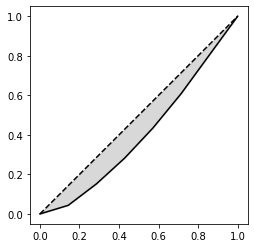

In [2]:
#---- ch03/plot-lorenz/graphics
import numpy as np
import matplotlib.pyplot as plt

# Fix random numbers
np.random.seed(101)

# Income
y = np.random.choice(range(1, 10), 7)

Y = np.r_[0, np.sort(y).cumsum() / y.sum()]
X = np.linspace(0, 1, y.size + 1)

fig, ax = plt.subplots(1, 1)
ax.plot(X, Y, 'k')
ax.plot(X, X, 'k--')
ax.fill_between(X, X, Y, color='gray', alpha=0.3)
ax.set_aspect('equal')

plt.show()

## 挿入用のコード

In [3]:
#---- ch03/def-functions/dnr
def f(): print("f is called.")
def g(): print("g is called.")
def h(): print("h is called.")

In [4]:
#---- ch03/sequential/dnr
f()
g()
h()

f is called.
g is called.
h is called.


In [5]:
#---- ch03/no-loop/dnr
f()    # 0回目
f()    # 1回目
f()    # 2回目
g()

f is called.
f is called.
f is called.
g is called.


#### for ループ

In [6]:
#---- ch03/for-loop/dnr
for i in [0, 1, 2]:
    f()

g()

f is called.
f is called.
f is called.
g is called.


In [7]:
#---- ch03/for-loop-equiv/dnr
i = 0
f()

i = 1
f()

i = 2
f()

g()

f is called.
f is called.
f is called.
g is called.


In [8]:
#---- ch03/for-loop-print
for i in [0, 1, 2]:
    print(i)

0
1
2


In [9]:
#---- ch03/for-with-range
for i in range(3):
    print(i)

0
1
2


#### 真偽値

In [10]:
#---- ch03/boolean
True

True

In [11]:
False

False

In [12]:
#---- ch03/boolean-and
[True and True, True and False, False and True, False and False]

[True, False, False, False]

In [13]:
#---- ch03/boolean-or
[True or True, True or False, False or True, False or False]

[True, True, True, False]

In [14]:
#---- ch03/boolean-not
[not True, not False]

[False, True]

In [15]:
#---- ch03/boolean-inequality
[1 < 2, 1 <= 2, 1 == 2, 1 > 2, 1 >= 2]

[True, True, False, False, False]

#### 真偽値の四則演算

In [16]:
#---- ch03/boolean-addition
True + True + False

2

#### 浮動小数点数の比較

In [17]:
#---- ch03/compare-real-numbers
0.1 + 0.3 + 0.6 == 1.0

True

In [18]:
0.3 + 0.6 + 0.1 == 1.0

False

In [19]:
#---- ch03/compare-real-numbers2
import numpy as np
np.allclose(0.1 + 0.3 + 0.6, 1.0, rtol=1e-15)

True

#### while ループ

In [20]:
#---- ch03/condition/noinc
condition = False
condition1 = True
condition2 = False

In [21]:
#---- ch03/while-loop-equiv/dnr
while condition:
    f()

In [22]:
#---- ch03/while-loop/dnr
i = 0
while i < 3:
    f()
    i += 1
    
g()

f is called.
f is called.
f is called.
g is called.


In [23]:
#---- ch03/inf-loop/error
raise(BaseException('Comment out before executing this cell.'))

#---- ch03/inf-loop/dnr
while True:
    print(i)
    i += 1

BaseException: Comment out before executing this cell.

#### if-elif-else

In [24]:
#---- ch03/if/dnr
if condition:
    f()

In [25]:
#---- ch03/if-else/dnr
if condition:
    f()
else:
    g()

g is called.


In [26]:
#---- ch03/if-elif-else/dnr
if condition1:
    f()
elif condition2:
    g()
else:
    h()

f is called.


In [27]:
#---- ch03/if-odds-total
total = 0
for i in range(1, 101):
    if i % 2 == 1:
        total += i

total

2500

#### ジェネレータ内包表記

In [28]:
#---- ch03/if-odds-total-comprehension
sum(i for i in range(1, 101) if i % 2 == 1)

2500

#### 真偽値の配列

In [29]:
#---- ch03/boolean-array
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
x < y

array([ True, False, False])

In [30]:
#---- ch03/boolean-array2
x[x < y]

array([1])

In [31]:
#---- ch03/set-random/noinc
np.random.seed(101)

In [32]:
#---- ch03/boolean-random
z = np.random.random(1000)
np.mean(z > 0.95)

0.053

#### 連鎖方式の実質GDPとGDPデフレータ

In [33]:
#---- ch03/gdp-data
price = np.array([[100, 100, 100],
                  [101, 99, 103],
                  [100, 98, 104],
                  [99, 97, 106.]])
quantity = np.array([[1000, 2000, 500],
                     [980, 1980, 510],
                     [1010, 1990, 520],
                     [1005, 2005, 530.]])

In [34]:
#---- ch03/gdp-nominal
nominal_gdp = np.sum(price * quantity, axis=1)
nominal_gdp

array([350000., 347530., 350100., 350160.])

In [35]:
#---- ch03/gdp-deflator
dfl = np.empty_like(nominal_gdp)
dfl[0] = 1.
for t in range(1, len(dfl)):
    dfl[t] = dfl[t-1] * (np.sum(price[t, :] * quantity[t, :]) 
                            / np.sum(price[t-1, :] * quantity[t, :]))
    
dfl * 100

array([100.        , 100.15273775,  99.44827695,  98.89752821])

In [36]:
#---- ch03/gdp-real
real_gdp = nominal_gdp / dfl
real_gdp

array([350000.        , 347000.        , 352042.2985066 , 354063.44966341])

#### 寄与率と寄与度

In [37]:
#---- ch03/toy-example
x0 = np.array([10, 20, 15])
x1 = np.array([9, 22, 16])
contribution = (x1 - x0) / x0.sum() * 100
contribution

array([-2.22222222,  4.44444444,  2.22222222])

In [38]:
#---- ch03/contribution-data
value = price * quantity
value

array([[100000., 200000.,  50000.],
       [ 98980., 196020.,  52530.],
       [101000., 195020.,  54080.],
       [ 99495., 194485.,  56180.]])

In [39]:
#---- ch03/contribution-nominal-gdp
np.allclose(nominal_gdp, np.sum(value, axis=1), rtol=1e-15)

True

In [40]:
#---- ch03/nominal-growth
np.diff(nominal_gdp, prepend=np.nan) / np.roll(nominal_gdp, shift=1)

array([        nan, -0.00705714,  0.00739505,  0.00017138])

In [41]:
#---- ch03/nominal-contribution
contribution = (np.diff(value, prepend=np.nan, axis=0) 
                / np.roll(nominal_gdp, shift=1).reshape(4, 1)) * 100
contribution

array([[        nan,         nan,         nan],
       [-0.29142857, -1.13714286,  0.72285714],
       [ 0.58124478, -0.28774494,  0.44600466],
       [-0.42987718, -0.15281348,  0.59982862]])

In [42]:
#---- ch03/contribution-sum
contribution.sum(axis=1)

array([        nan, -0.70571429,  0.7395045 ,  0.01713796])

#### 不平等指数

##### 1. 相対的貧困率

In [43]:
#---- ch03/median
x = np.array([3, 6, 10, 14, 3, 2, 1, 1])
np.median(x)

3.0

In [44]:
#---- ch03/relative-poverty
x < np.median(x) / 2

array([False, False, False, False, False, False,  True,  True])

In [45]:
#---- ch03/relative-poverty-rate
np.mean(x < np.median(x) / 2)

0.25

##### 2. ジニ係数

In [46]:
#---- ch03/gini-random-data
x = np.random.choice(np.arange(30.), 10)
x

array([24., 19., 29., 14., 20., 23., 21.,  0., 24., 19.])

In [47]:
#---- ch03/gini-sorted-data
y = np.sort(x)
y

array([ 0., 14., 19., 19., 20., 21., 23., 24., 24., 29.])

In [48]:
#---- ch03/gini-cum-income
Y = np.r_[0, y.cumsum()] / y.sum()
Y

array([0.        , 0.        , 0.07253886, 0.17098446, 0.26943005,
       0.37305699, 0.48186528, 0.60103627, 0.7253886 , 0.84974093,
       1.        ])

In [49]:
#---- ch03/gini-formula
gini = 1 - (2 * np.sum(Y) - 1) / y.size
gini

0.19119170984455958

##### 3. トップ 1% 所得シェア

In [50]:
#---- ch03/top-1percent
x[x >= np.quantile(x, 0.99)]

array([29.])

In [51]:
#---- ch03/top-1percent-share
x[x >= np.quantile(x, 0.99)].sum() / x.sum()

0.15025906735751296